<a href="https://colab.research.google.com/github/ambreenraheem/Deep-Learning/blob/main/OpenCV_vedio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2

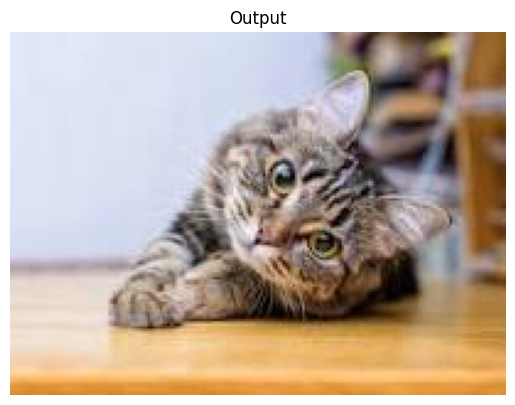

In [ ]:
import cv2
from matplotlib import pyplot as plt
# Read the image
img = cv2.imread("/content/download.jfif")

# Convert BGR (OpenCV default) to RGB for proper display with matplotlib
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Display
plt.imshow(img_rgb)
plt.axis('off')  # Hide axis
plt.title("Output")
plt.show()

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

# Open the video file
cap = cv2.VideoCapture("/content/elon.mp4")

# Check if video opened successfully
if not cap.isOpened():
    print("Error: Could not open video.")
else:
    frames = []
    frame_count = 0
    max_frames = 10  # Change this number to control how many frames to show
    resize_dim = (160, 160)  # Resize all frames to same size for grid

    while frame_count < max_frames:
        success, img = cap.read()
        if not success:
            print("End of video or failed to read frame.")
            break

        img_resized = cv2.resize(img, resize_dim)
        frames.append(img_resized)
        frame_count += 1

    cap.release()

    # Horizontally concatenate frames if we have any
    if frames:
        grid_image = cv2.hconcat(frames)
        print(f"Grid shape: {grid_image.shape}")
        cv2_imshow(grid_image)
    else:
        print("No frames were read to display.")


Error: Could not open video.


2D grid shape: (320, 800, 3)


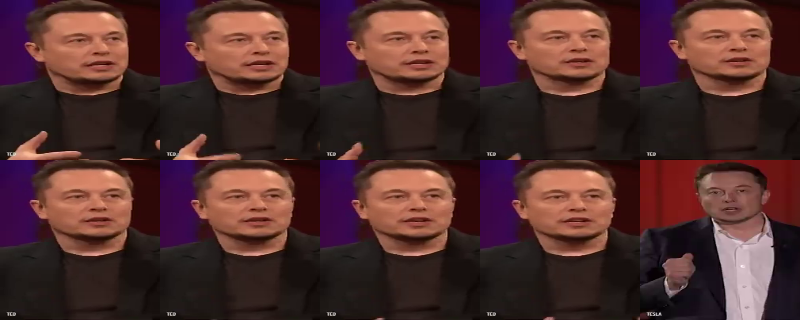

In [ ]:
# 2D Frame Grid (5x2) in Google Colab
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from google.colab import files


# Open the video file
cap = cv2.VideoCapture("/content/elon.mp4")

if not cap.isOpened():
    print("Error: Could not open video.")
else:
    frames = []
    frame_count = 0
    max_frames = 10
    resize_dim = (160, 160)  # Resize all frames to a standard size

    # Read and resize frames
    while frame_count < max_frames:
        success, img = cap.read()
        if not success:
            print("End of video or failed to read frame.")
            break
        img_resized = cv2.resize(img, resize_dim)
        frames.append(img_resized)
        frame_count += 1

    cap.release()

    # Make sure we have exactly 10 frames
    if len(frames) == 10:
        # Create two rows, each with 5 images
        row1 = cv2.hconcat(frames[0:5])
        row2 = cv2.hconcat(frames[5:10])
        grid_2d = cv2.vconcat([row1, row2])

        print(f"2D grid shape: {grid_2d.shape}")
        cv2_imshow(grid_2d)
    else:
        print("Not enough frames to create a 5x2 grid.")





Saved grid image to: /content/frame_grid.jpg


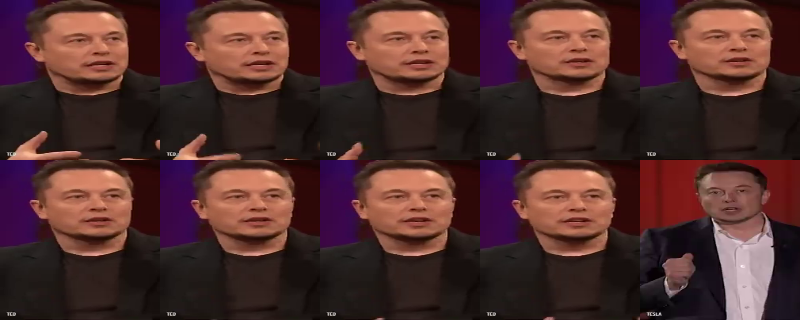

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Save the image to file
output_path = "/content/frame_grid.jpg"
cv2.imwrite(output_path, grid_2d)
# Display the saved image
print(f"Saved grid image to: {output_path}")
cv2_imshow(grid_2d)

# Offer the file for download
files.download(output_path)

Saved grid image to: /content/frame_grid_with_labels.jpg


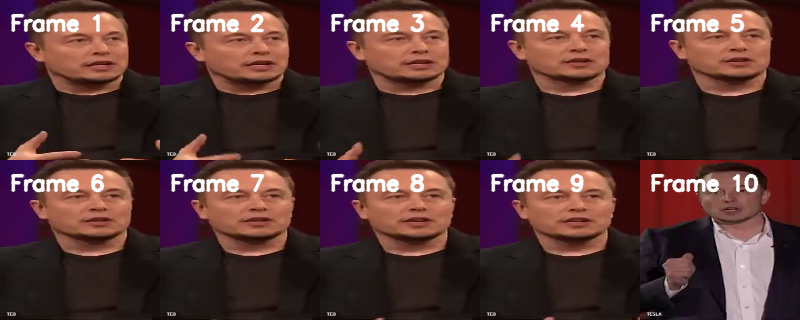

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Add Frame Number Labels to Each Image in the 2D Grid
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from google.colab import files

# Open the video file
cap = cv2.VideoCapture("/content/elon.mp4")

if not cap.isOpened():
    print("Error: Could not open video.")
else:
    frames = []
    frame_count = 0
    max_frames = 10
    resize_dim = (160, 160)  # Resize all frames to same size

    # Read and resize frames
    while frame_count < max_frames:
        success, img = cap.read()
        if not success:
            print("End of video or failed to read frame.")
            break
        img_resized = cv2.resize(img, resize_dim)

        # Add frame number label to the image
        label = f"Frame {frame_count + 1}"  # Frame numbers starting from 1
        cv2.putText(img_resized, label, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 2, cv2.LINE_AA)

        frames.append(img_resized)
        frame_count += 1

    cap.release()

    # Create and save grid
    if len(frames) == 10:
        # Stack into 2D grid (5x2)
        row1 = cv2.hconcat(frames[0:5])
        row2 = cv2.hconcat(frames[5:10])
        grid_2d = cv2.vconcat([row1, row2])

        # Save the image to file
        output_path = "/content/frame_grid_with_labels.jpg"
        cv2.imwrite(output_path, grid_2d)

        # Display the saved image
        print(f"Saved grid image to: {output_path}")
        cv2_imshow(grid_2d)

        # Offer the file for download
        files.download(output_path)

    else:
        print("Not enough frames to create a 5x2 grid.")


Original Image Shape:  (148, 202, 3)
Grayscale Image Shape:  (148, 202)


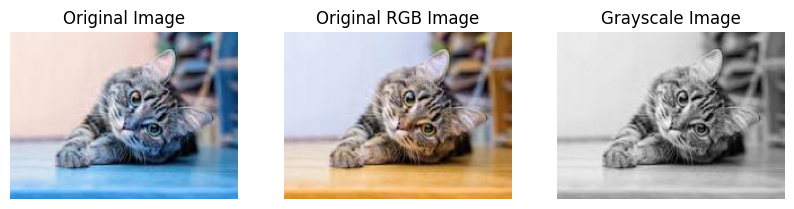

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Load the image
img = cv2.imread("/content/download.jfif")

# Convert to grayscale
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Print shapes
print("Original Image Shape: ", img.shape)
print("Grayscale Image Shape: ", img_gray.shape)

# Display the original image and grayscale image
# Convert BGR to RGB for correct display with matplotlib
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Plot the images side by side
plt.figure(figsize=(10,5))


# Display original image
plt.subplot(1, 3, 1)
plt.imshow(img)
plt.title("Original Image")
plt.axis('off')  # Turn off axis



# Display original image
plt.subplot(1, 3, 2)
plt.imshow(img_rgb)
plt.title("Original RGB Image")
plt.axis('off')  # Turn off axis

# Display grayscale image
plt.subplot(1, 3, 3)
plt.imshow(img_gray, cmap='gray')
plt.title("Grayscale Image")
plt.axis('off')  # Turn off axis

# Show the images
plt.show()


Original Image Shape:  (148, 202, 3)
Blurred Image Shape:  (148, 202, 3)


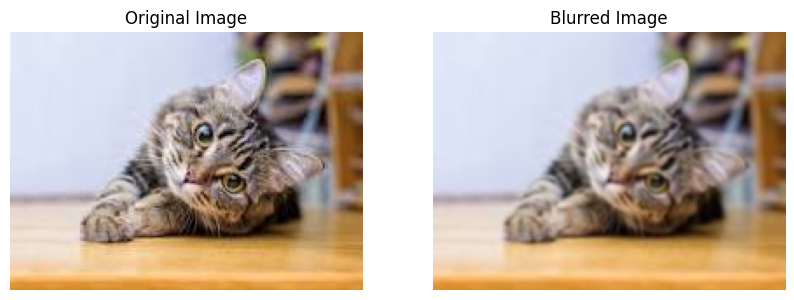

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Load the image
img = cv2.imread("/content/download.jfif")

# Apply Gaussian blur
img_blurred = cv2.GaussianBlur(img, (3, 3), 0)

# Print shapes
print("Original Image Shape: ", img.shape)
print("Blurred Image Shape: ", img_blurred.shape)

# Convert BGR to RGB for correct display with matplotlib
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_blurred_rgb = cv2.cvtColor(img_blurred, cv2.COLOR_BGR2RGB)

# Plot the images side by side
plt.figure(figsize=(10,5))

# Display original image
plt.subplot(1, 2, 1)
plt.imshow(img_rgb)
plt.title("Original Image")
plt.axis('off')  # Turn off axis

# Display blurred image
plt.subplot(1, 2, 2)
plt.imshow(img_blurred_rgb)
plt.title("Blurred Image")
plt.axis('off')  # Turn off axis

# Show the images
plt.show()


Original Image Shape:  (148, 202, 3)
Canny Image Shape:  (148, 202)


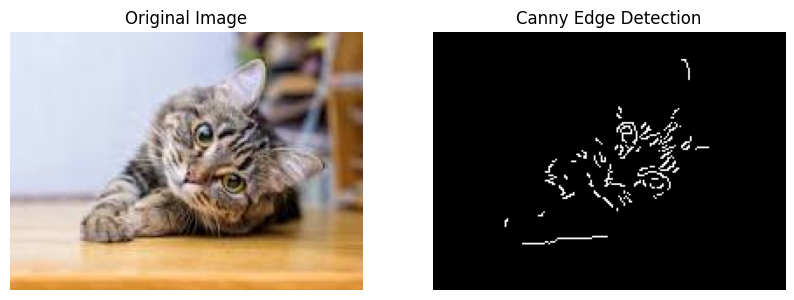

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Load the image
img = cv2.imread("/content/download.jfif")

# Convert to grayscale (Canny works on single channel images)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply Canny edge detection
low_threshold = 400  # Lower threshold for Canny edge detection
high_threshold = 500  # Higher threshold for Canny edge detection
img_canny = cv2.Canny(img_gray, low_threshold, high_threshold)

# Print shapes
print("Original Image Shape: ", img.shape)
print("Canny Image Shape: ", img_canny.shape)

# Convert BGR to RGB for correct display with matplotlib
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Plot the images side by side
plt.figure(figsize=(10,5))

# Display original image
plt.subplot(1, 2, 1)
plt.imshow(img_rgb)
plt.title("Original Image")
plt.axis('off')  # Turn off axis

# Display Canny edge detection result
plt.subplot(1, 2, 2)
plt.imshow(img_canny, cmap='gray')
plt.title("Canny Edge Detection")
plt.axis('off')  # Turn off axis

# Show the images
plt.show()


(148, 202, 3)
(120, 120, 3)


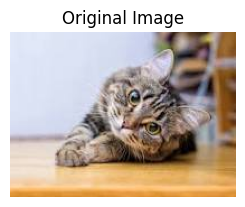

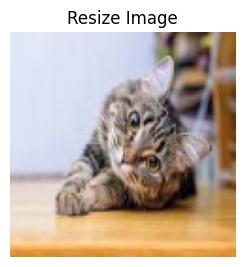

In [ ]:
import cv2
import matplotlib.pyplot as plt
## Resizing images

# Load the image
img = cv2.imread('/content/download.jfif')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

print(img.shape)

resized_img = cv2.resize(img_rgb, (120, 120))
print(resized_img.shape)

# Display original image
plt.subplot(1, 2, 1)
plt.imshow(img_rgb)
plt.title("Original Image")
plt.axis('off')  # Turn off axis
plt.show()


# Resize original image
plt.subplot(1, 2, 1)
plt.imshow(resized_img)
plt.title("Resize Image")
plt.axis('off')  # Turn off axis
plt.show()

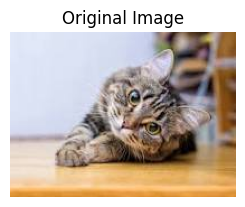

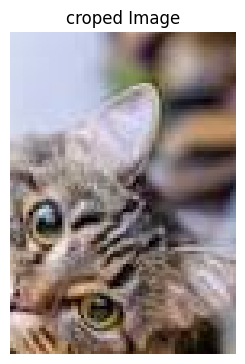

In [ ]:
### Croping Image
img = cv2.imread('/content/download.jfif')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

crop_img = img_rgb[0:100,100:170]

# Display original image
plt.subplot(1, 2, 1)
plt.imshow(img_rgb)
plt.title("Original Image")
plt.axis('off')  # Turn off axis
plt.show()


# Display original image
plt.subplot(1, 2, 1)
plt.imshow(crop_img)
plt.title("croped Image")
plt.axis('off')  # Turn off axis
plt.show()

(512, 512, 3)


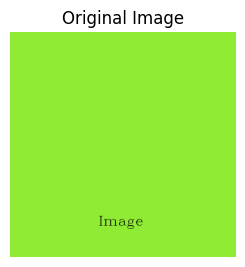

In [ ]:
import cv2
import numpy as np

img = np.zeros((512, 512, 3), np.uint8)
#print(img)
print(img.shape)

img[:] = 143, 235, 52

# Create a line
#cv2.line(img, (0,0), (300,400), (255,0,0), 3)

### Rectangle
#cv2.rectangle(img, (0,0), (250, 350), (0,0,255), 7)

### Create circle
#cv2.circle(img, (400,50), 50, (0,0,255), 4)

### Put texts
cv2.putText(img, "Image", (200,440), cv2.FONT_HERSHEY_COMPLEX,1, (0,0,0), 1)

# Display original image
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title("Original Image")
plt.axis('off')  # Turn off axis
plt.show()


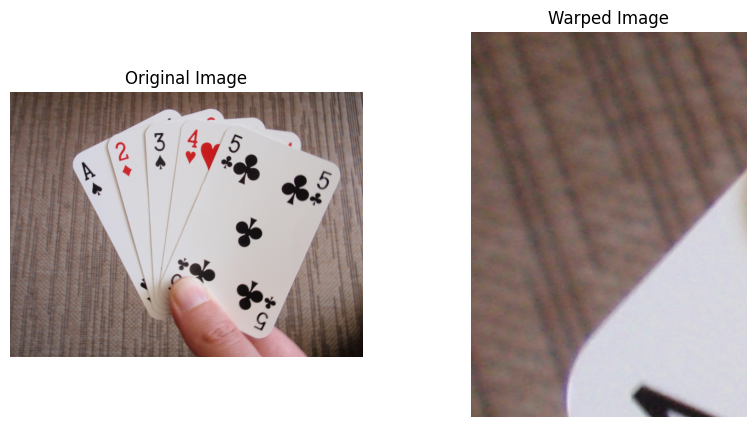

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt  # Importing matplotlib for image display

# Set desired output dimensions
width, height = 250, 350

# Load image
#from google.colab import files
#uploaded = files.upload()

img = cv2.imread("/content/cards.jfif")
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


# Define source and destination points
pts1 = np.float32([[752, 118], [1120, 265], [540, 668], [871, 830]])
pts2 = np.float32([[0, 0], [width, 0], [0, height], [width, height]])

# Get perspective transform matrix and apply warp
matrix = cv2.getPerspectiveTransform(pts1, pts2)
img_out = cv2.warpPerspective(img, matrix, (width, height))


img_out_rgb = cv2.cvtColor(img_out, cv2.COLOR_BGR2RGB)

# Display original and warped images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img_rgb)
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_out_rgb)
plt.title("Warped Image")
plt.axis('off')

plt.show()


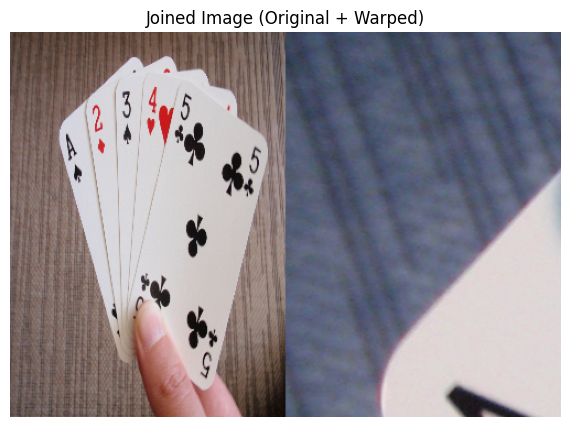

In [ ]:
# joining_img

# Read the image
img = cv2.imread("/content/cards.jfif")

# Convert BGR (OpenCV default) to RGB for proper display with matplotlib
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# Resize the original image to match the warped image's height and width
resized_img = cv2.resize(img_rgb, (width, height))

# Join the images horizontally (side-by-side)
joined_img = np.hstack((resized_img, img_out))

# Display the joined image using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(joined_img)
plt.title("Joined Image (Original + Warped)")
plt.axis('off')
plt.show()
